In [1]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('TEST1_Result.csv')
data

,predict,real,check,count,accuracy
0,stand,stand,O,1,0.062383
1,stand,stand,O,2,0.124766
2,stand,stand,O,3,0.187149
3,stand,stand,O,4,0.249532
4,stand,stand,O,5,0.311915
...,...,...,...,...,...
1598,stand,stand,O,1222,76.232065
1599,stand,stand,O,1223,76.294448
1600,stand,stand,O,1224,76.356831
1601,stand,stand,O,1225,76.419214


In [3]:
predict = data['predict']
real = data['real']

In [4]:
print(type(predict))
print(type(real))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [139]:
cf_matrix = confusion_matrix(predict, real)
cf_matrix

array([[244,   0,  35],
       [  2, 611, 250],
       [  9,  81, 371]])

In [140]:
from sklearn.metrics import multilabel_confusion_matrix

In [141]:
multi_cf_matrix = multilabel_confusion_matrix(predict, real)
print(multi_cf_matrix)

"""
    
    sit
    stand
    walking
"""

[[[1313   11]
  [  35  244]]

 [[ 659   81]
  [ 252  611]]

 [[ 857  285]
  [  90  371]]]


'\n    \n    sit\n    stand\n    walking\n'

In [142]:
sit_cf = multi_cf_matrix[0]
stand_cf = multi_cf_matrix[1]
walking_cf = multi_cf_matrix[2]

In [143]:
print(stand_cf)

[[659  81]
 [252 611]]


In [144]:
def get_roc_value(data):

    """
    Precision = TP / TP + FP
    Recall = TP / TP + FN
    """
    
    TN = data[0][0]
    FP = data[0][1] 
    FN = data[1][0] 
    TP = data[1][1]
    
#     data_fn = data[0][0]
#     data_fp = data[0][1]
#     data_tn = data[1][0]
#     data_tp = data[1][1]
    
    Precision = TP / (TP+FP)
    Recall = TP / (TP + FN)
    f1 = 2 * ((Precision * Recall) / (Precision + Recall))
    
#     data_precision = data_tp / (data_tp + data_fp)
#     data_recall = data_tp / (data_tp + data_fn)

    return Precision, Recall, f1
#     return data_precision, data_recall

stand_precision, stand_recall, stand_f1 = get_roc_value(stand_cf)
walking_precision, walking_recall, walking_f1 = get_roc_value(walking_cf)
sit_precision, sit_recall, sit_f1 = get_roc_value(sit_cf)

In [145]:
"""
transform roc to csv
"""
my_dict = {"Stance": ['Stand', 'Walking', 'Sit'],
           "Precision": [stand_precision, walking_precision, sit_precision],
           "Recall": [stand_recall, walking_recall, sit_recall],
           "f1Score": [stand_f1, walking_f1, sit_f1]}
roc_df_2 = pd.DataFrame(data = my_dict, index=None)
roc_df_2

,Stance,Precision,Recall,f1Score
0,Stand,0.882948,0.707995,0.785852
1,Walking,0.565549,0.804772,0.664279
2,Sit,0.956863,0.874552,0.913858


In [146]:
#make csv for seaborn
roc_df_2.to_csv('cm_data.csv', index=False)

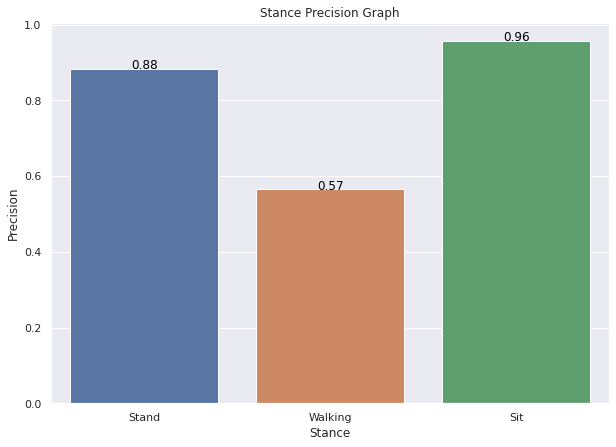

In [147]:
test_data = pd.read_csv('cm_data.csv')

sns.set(rc = {'figure.figsize':(10,7)})

pr_bar = sns.barplot(data=test_data, x ='Stance', y = 'Precision')
# test_data = pd.read_csv('3.csv')
test_data.groupby('Precision').sum().reset_index()
for index, row in test_data.iterrows():
    pr_bar.text(row.name,row.Precision, round(row.Precision,2), color='black', ha="center")

plt.title("Stance Precision Graph")
fig = pr_bar.get_figure()
fig.savefig('pr_bar.png') 

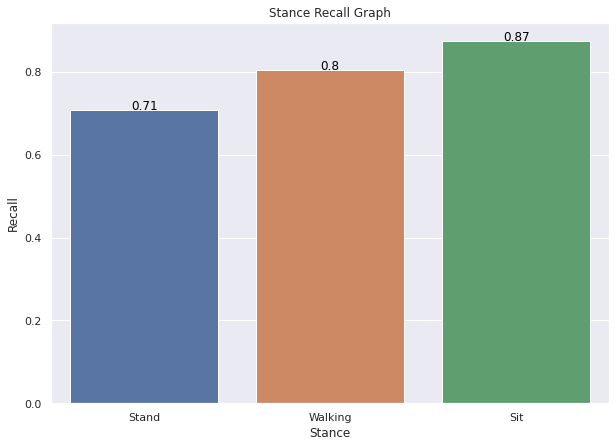

In [148]:
rc_bar = sns.barplot(data=test_data, x ='Stance', y = 'Recall')
test_data = pd.read_csv('cm_data.csv')
test_data.groupby('Recall').sum().reset_index()

for index, row in test_data.iterrows():
    rc_bar.text(row.name,row.Recall, round(row.Recall,2), color='black', ha="center")
    
plt.title("Stance Recall Graph")
fig = rc_bar.get_figure()
fig.savefig('rc_bar.png') 

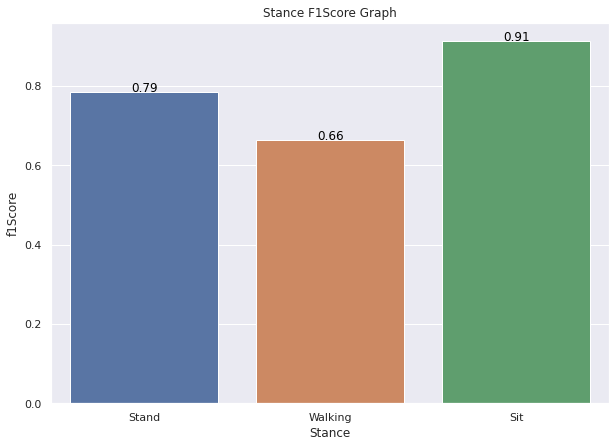

In [149]:
test_data = pd.read_csv('cm_data.csv')
sns.set(rc = {'figure.figsize':(10,7)})
f1_bar = sns.barplot(data=test_data, x ='Stance', y = 'f1Score')

test_data.groupby('f1Score').sum().reset_index()
for index, row in test_data.iterrows():
    f1_bar.text(row.name,row.f1Score, round(row.f1Score,2), color='black', ha="center")

plt.title("Stance F1Score Graph")
fig = pr_bar.get_figure()
fig.savefig('f1_bar.png') 

In [103]:
print(stand_cf)
print(sit_cf)
print(walking_cf)

[[659  81]
 [252 611]]
[[1313   11]
 [  35  244]]
[[857 285]
 [ 90 371]]


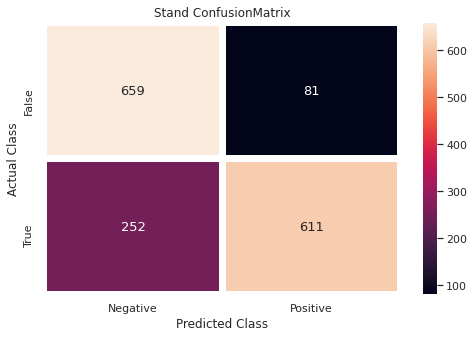

In [150]:
XLABEL = ['Negative', 'Positive']
YLABEL = ['False', 'True']
sns.set(rc = {'figure.figsize':(8,5)})
stand_cm = sns.heatmap(stand_cf, xticklabels = XLABEL, yticklabels = YLABEL, annot=True, fmt="d", linewidths=6, annot_kws={"size": 13})


plt.title("Stand ConfusionMatrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

fig = stand_cm.get_figure()
fig.savefig('stand_cm.png') 

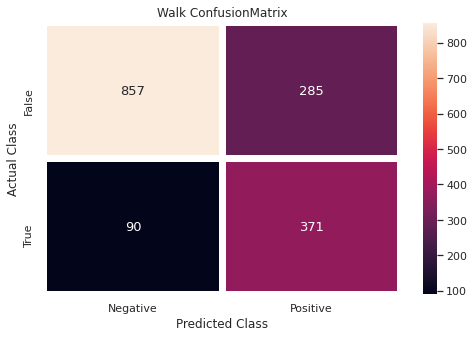

In [151]:
walk_cm = sns.heatmap(walking_cf, xticklabels = XLABEL, yticklabels = YLABEL, annot=True, fmt='d', linewidths=6, annot_kws={"size": 13})

plt.title("Walk ConfusionMatrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

fig = walk_cm.get_figure()
fig.savefig('walk_cm.png') 

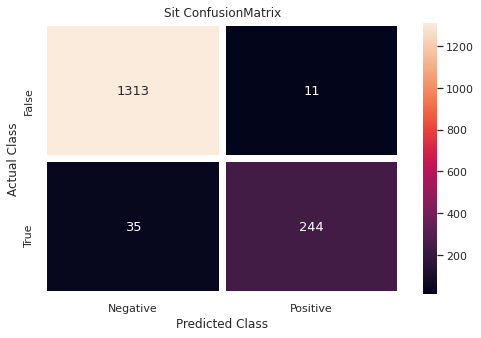

In [152]:
sit_cm = sns.heatmap(sit_cf, xticklabels = XLABEL, yticklabels = YLABEL,  annot=True, fmt='d', linewidths=6, annot_kws={"size": 13})

plt.title("Sit ConfusionMatrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

fig = sit_cm.get_figure()
fig.savefig('sit_cm.png') 